In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [2]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [ ]:
cohort = "experimental"

data_method = "test_data"
eval_method = "test_eval"

scene = "mid_gate"

courses = ["traverse"]   

roster = [
    "hsCameron",
    "hsSteiner",
    "hsDavion",
    "hsKurita",
    "clanGhostBear",
    "clanJadeFalcon",
    "clanNovaCat",
    "clanSmokeJaguar",
    "clanWolf",
    ]

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Output()

Showing 50 samples from [traverse]>trajectories005.pt

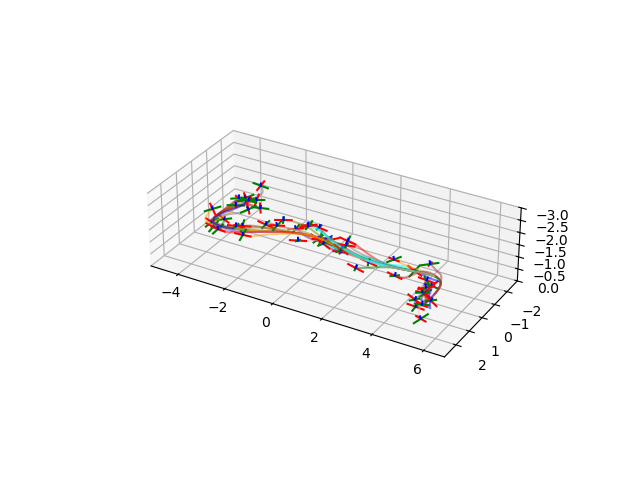

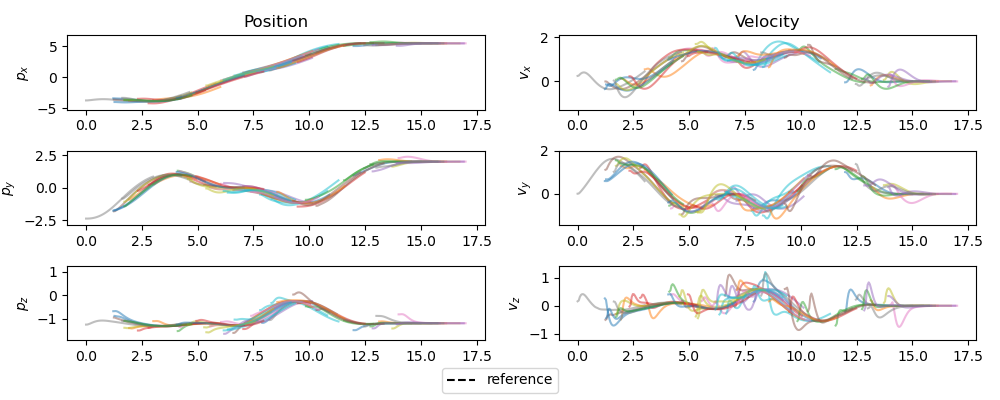

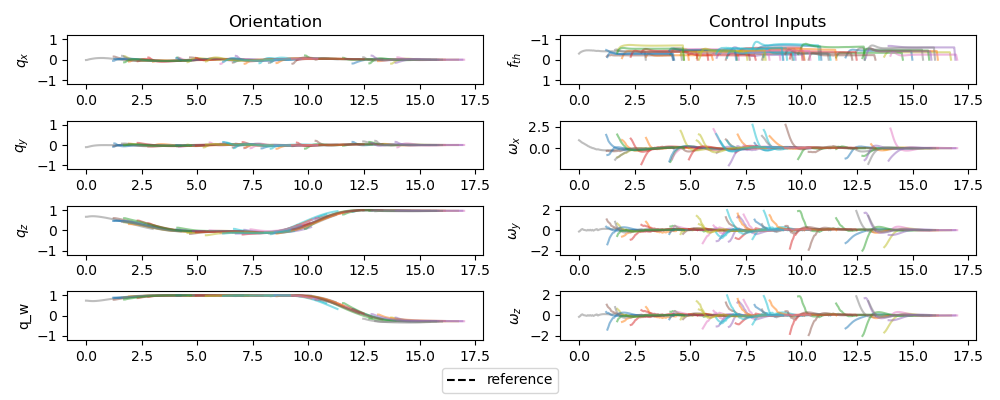

Rollout produced 6 datasets with the following courses: 
traverse  (17100 dpts) [6 datasets]

In [4]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [5]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

Generating observation data with subsample ratio 1.0 for...
 Cohort : experimental
 Roster : ['hsCameron', 'hsSteiner', 'hsDavion', 'hsKurita', 'clanGhostBear', 'clanJadeFalcon', 'clanNovaCat', 
'clanSmokeJaguar']
 Courses: ['traverse']

Output()

In [ ]:
# Train the Policy
# tp.train_roster(cohort,yroster,"commNet",200)
tp.train_roster(cohort,roster,"commNet",200,
                use_deploy=scene,deploy_method=eval_method,lim_sv=20)

pl.plot_losses(cohort,roster,"commNet",use_log=True)

Generating observation data with subsample ratio 1.0 for...
 Cohort : experimental
 Roster : ['clanWolf']
 Courses: ['traverse']

Output()

Using existing observation data...

Output()

Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Loading latest checkpoint from load_dir

✅ Done loading checkpoint from outputs/mid_gate/splatfacto/2024-10-07_145741/nerfstudio_models/step-000029999.ckpt


iter	res_stat	res_eq		res_ineq	res_comp	qp_stat	qp_iter	alpha
0	5.482524e-02	3.667947e-04	6.012782e-01	6.996610e-02	0	0	0.000000e+00	
1	2.373758e-02	2.785674e-02	2.081668e-17	9.633550e-09	0	6	1.000000e+00	
2	5.318737e-04	1.086699e-03	0.000000e+00	1.809398e-08	0	6	1.000000e+00	
3	1.773786e-07	1.324924e-06	0.000000e+00	2.982354e-08	0	6	1.000000e+00	
4	9.530452e-06	3.115565e-09	0.000000e+00	5.638367e-16	2	50	1.000000e+00	
5	9.723960e-06	1.283584e-12	0.000000e+00	5.638367e-16	2	50	1.000000e+00	
6	9.728478e-06	8.881784e-16	0.000000e+00	5.638367e-16	2	50	1.000000e+00	
7	9.728583e-06	8.881784e-16	0.000000e+00	5.638367e-16	2	50	1.000000e+00	
8	9.728586e-06	8.881784e-16	0.000000e+00	5.638367e-16	2	50	1.000000e+00	
9	9.728586e-06	8.881784e-16	0.000000e+00	5.638367e-16	2	50	1.000000e+00	
10	9.728586e-06	4.440892e-16	0.000000e+00	5.638367e-16	2	50	1.000000e+00	
11	9.728586e-06	4.440892e-16	0.000000e+00	5.638367e-16	2	50	1.000000e+00	
12	9.728586e-06	4.440892e-16	0.000000e+00	5.638367e-16	2	50	1.0

Plotting trajectories for expert...

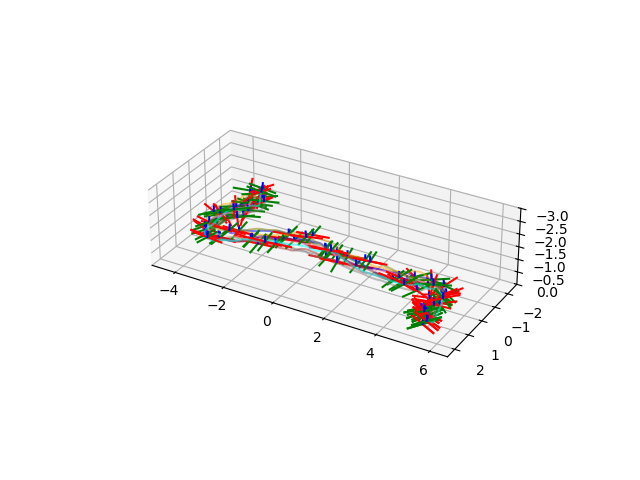

Plotting trajectories for hsCameron...

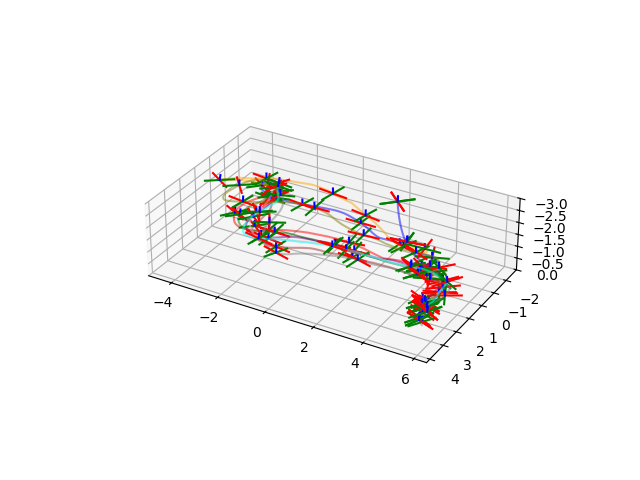

Plotting trajectories for hsSteiner...

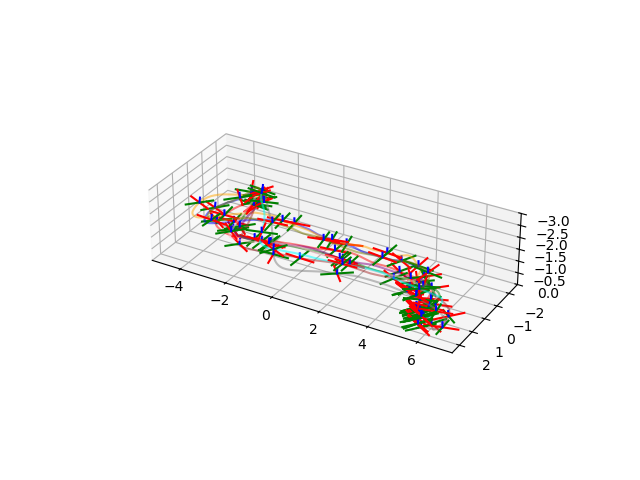

Plotting trajectories for hsDavion...

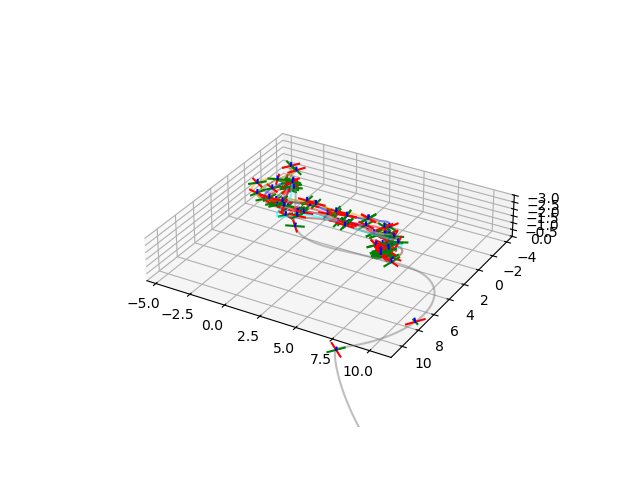

Plotting trajectories for hsKurita...

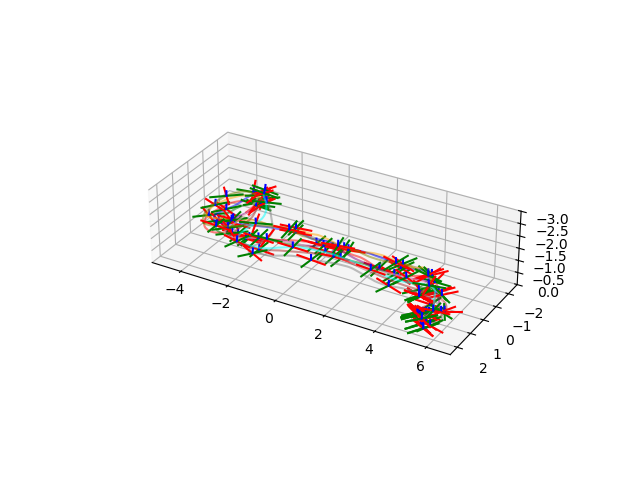

Plotting trajectories for clanGhostBear...

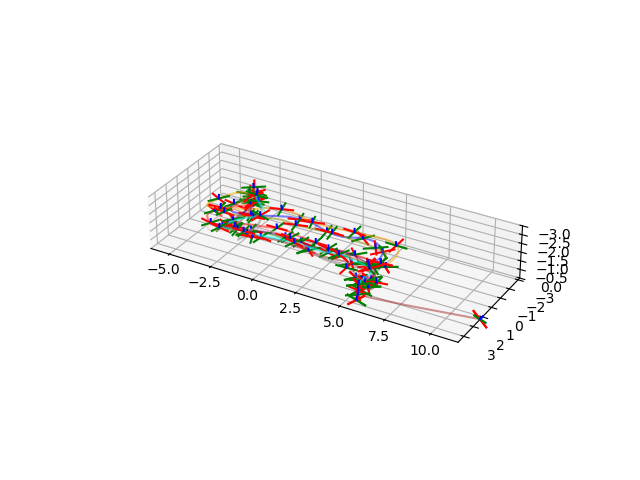

Plotting trajectories for clanJadeFalcon...

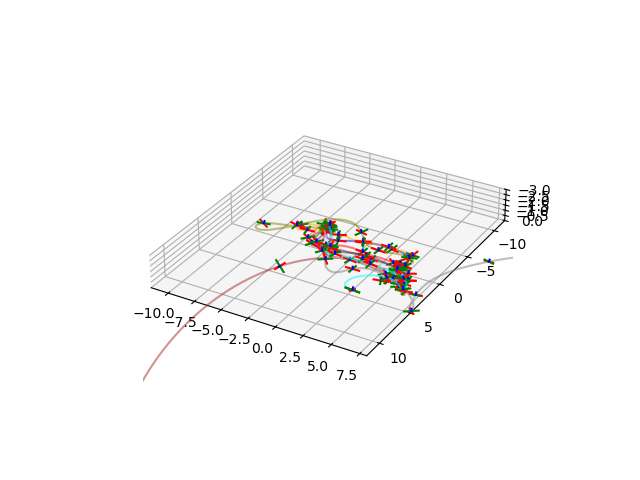

Plotting trajectories for clanNovaCat...

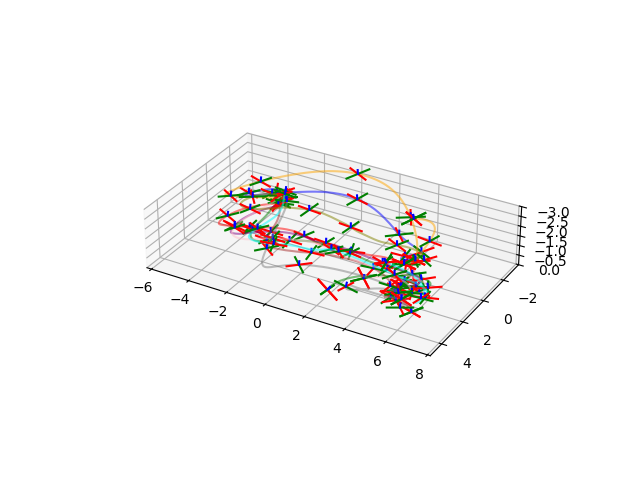

Plotting trajectories for clanSmokeJaguar...

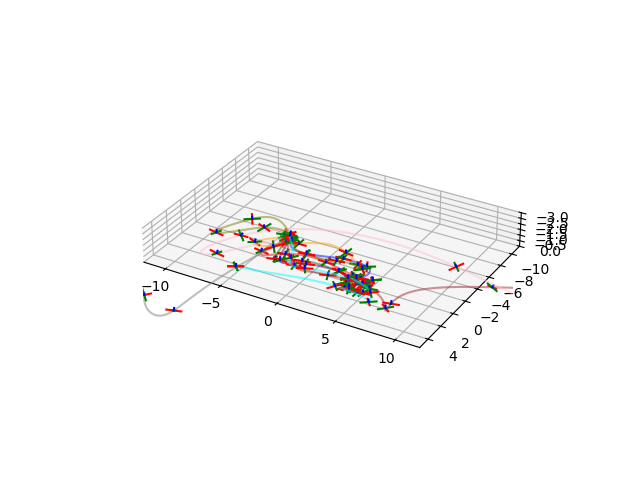

                         Deployment Summary                          
┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┓
┃ Pilot           ┃ TTE Mean ┃ TTE Best ┃  PP  ┃ Hz Mean ┃ Hz Worst ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━━┩
│ expert          │   0.30   │   0.12   │ 0.50 │ 123.50  │   1.38   │
│ hsCameron       │   0.82   │   0.33   │ 0.09 │ 1203.26 │  158.68  │
│ hsSteiner       │   0.64   │   0.31   │ 0.14 │ 850.08  │  151.62  │
│ hsDavion        │   2.56   │   0.30   │ 0.12 │ 857.26  │  153.87  │
│ hsKurita        │   0.47   │   0.23   │ 0.25 │ 875.85  │  153.58  │
│ clanGhostBear   │   0.86   │   0.43   │ 0.05 │ 600.78  │  143.50  │
│ clanJadeFalcon  │   2.20   │   0.47   │ 0.05 │ 604.47  │  141.38  │
│ clanNovaCat     │   1.29   │   0.68   │ 0.03 │ 625.61  │  143.58  │
│ clanSmokeJaguar │  16.06   │   0.79   │ 0.03 │ 660.31  │  147.87  │
└─────────────────┴──────────┴──────────┴──────┴─────────┴──────────┘

In [ ]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,course,scene,eval_method,roster,mode="visualize")
    pl.plot_deployments(cohort,course,roster,plot_show=True)